In [1]:
#Import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix


In [2]:
#Import data file
df = pd.read_csv('./data-sets/Mobile Usability.csv')
print(df.head())

   years_used  battery_life_hours  usable
0        3.75                4.44       1
1        9.51                3.44       0
2        7.32                6.65       1
3        5.99                3.22       0
4        1.56                3.94       1


In [3]:
#split data into X and y variable
X = df.loc[:, ['years_used', 'battery_life_hours']]
y = df['usable']

In [4]:
#Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(175, 2) (75, 2) (175,) (75,)


In [5]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train)

print(f'Coeff: {model.coef_} & intercept: {model.intercept_}')


Coeff: [[-0.76819487  1.98154475]] & intercept: [-1.46883604]


In [6]:
#Predict the data on the test data
y_pred = model.predict(x_test)
print(np.array(y_test))
print(np.array(y_pred))

[1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 1]
[1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1
 1]


In [7]:
def conf_matrix(y_actual, y_pred):
    actual_data = np.array(y_actual)
    predicted_data = np.array(y_pred)

    #return if the size of actual and predicted data is not same
    if(len(actual_data) != len(predicted_data)): return
    conf = np.array([[0, 0],
                     [0, 0]])
    for i in range(len(actual_data)):
        if(actual_data[i]):
            if(predicted_data[i]):
                conf[1, 1] += 1 #correct
            else:
                conf[1, 0] += 1
        else:
            if(predicted_data[i]):
                conf[0, 1] += 1
            else:
                conf[0, 0] += 1
    
    return conf


print(conf_matrix(y_test, y_pred))

[[19  3]
 [ 0 53]]


               Predicted Positive   Predicted Negative
Actual Positive True Positive (TP)  |       False Negative (FN)

Actual Negative False Positive (FP) |       True Negative (TN)


In [8]:
def prec_score(actual, pred):
    confMat = conf_matrix(actual, pred)
    return (confMat[1, 1] / (confMat[1, 1] + confMat[0, 1]))
print(f'Precision Score : {prec_score(y_test, y_pred)}')

Precision Score : 0.9464285714285714


In [9]:
def reclScore(actual, pred):
    confMat = conf_matrix(actual, pred)
    return (confMat[1,1] / (confMat[1,1] + confMat[1, 0]))
print(f'Recall Score : {reclScore(y_test, y_pred)}')

Recall Score : 1.0


In [10]:
#Accuracy
def acc(actual, pred):
    confMat = conf_matrix(actual, pred)
    return ((confMat[0, 0] + confMat[1, 1]) / len(np.array(actual)))

print(f'Accuracy : {acc(y_test, y_pred)}')

Accuracy : 0.96


In [11]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precisionScore = precision_score(y_test, y_pred)
recallScore = recall_score(y_test, y_pred)
confusionMatrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy : {accuracy}')
print(f'Precision Score: {precisionScore}')
print(f'Recall Score : {recallScore}')
print(f'Confusion Matrix : \n{confusionMatrix}')

Accuracy : 0.96
Precision Score: 0.9464285714285714
Recall Score : 1.0
Confusion Matrix : 
[[19  3]
 [ 0 53]]


c:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


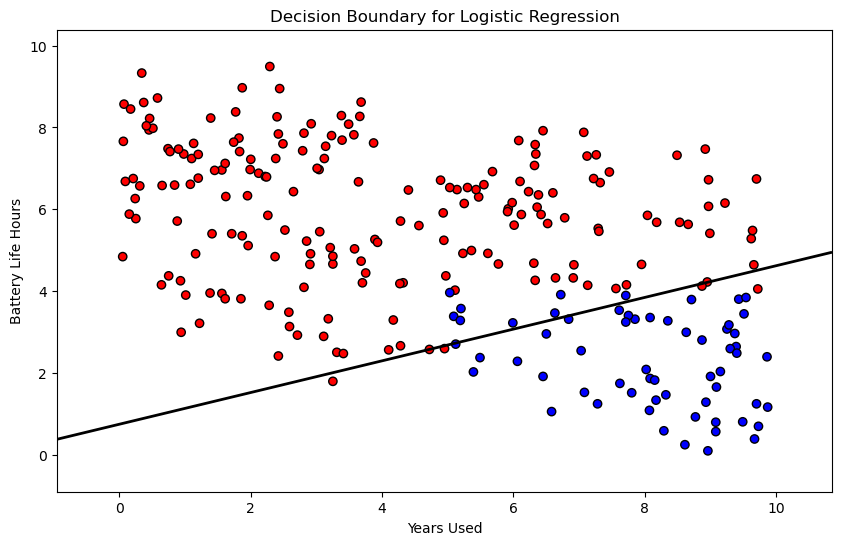

In [12]:
#Get the grid for the graph to plot data
x_min, x_max = X['years_used'].min() -1, X['years_used'].max() + 1
y_min, y_max = X['battery_life_hours'].min() - 1, X['battery_life_hours'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

#Predict on the mesh grid
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

#Plot the decision boundary
plt.figure(figsize=(10,6))
plt.contour(xx, yy, Z, levels=[0.5], colors='black',linewidths=2)
plt.scatter(X['years_used'], X['battery_life_hours'], c=y, edgecolor='k', cmap=ListedColormap(['blue', 'red']))
plt.xlabel('Years Used')
plt.ylabel('Battery Life Hours')
plt.title('Decision Boundary for Logistic Regression')
plt.show()


